### Importing the MINST Dataset

In [1]:
import numpy as np
import pandas as pd
from random import choice
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

### Exploring the dataset

In [2]:
X, y = mnist.data, mnist.target
print(X)
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['5' '0' '4' ... '4' '5' '6']


In [3]:
X.shape, y.shape

((70000, 784), (70000,))

5


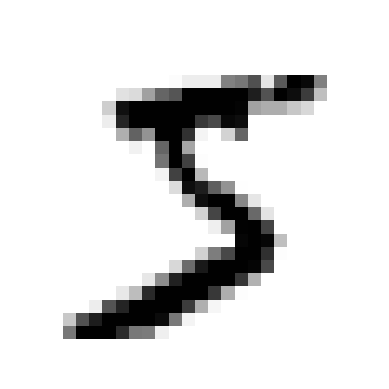

In [4]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
print(y[0])
plot_digit(some_digit)
plt.show()

### Preparing the dataset

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

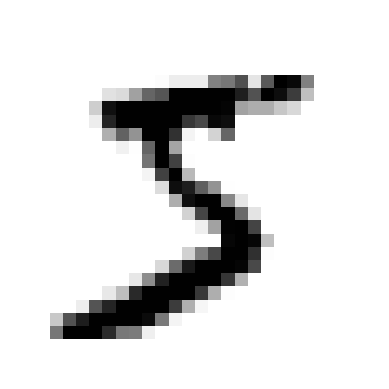

In [6]:
def shift_random(image, direction=None):
    from scipy.ndimage import shift
    image = image.reshape((28, 28))
    if direction is None:
        direction = choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
    image = shift(image, direction, cval=0)
    return image.reshape((784))

shifted_digit = shift_random(some_digit)
plot_digit(shifted_digit)

In [7]:
X_train_expanded = []
y_train_expanded = []

for idx, image in enumerate(X_train):
    X_train_expanded.append(image)
    y_train_expanded.extend([y_train[idx]] * 5)
    for direction in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
        shifted_image = shift_random(image, direction)
        X_train_expanded.append(shifted_image)

X_train_expanded = np.array(X_train_expanded)
y_train_expanded = np.array(y_train_expanded)

In [8]:
X_train_expanded.shape, y_train_expanded.shape

((300000, 784), (300000,))

### Building the classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [10]:
knn_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [11]:
from sklearn.metrics import accuracy_score

y_test_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9763